<a href="https://colab.research.google.com/github/taoo0316/Applied-Data-Science/blob/main/A0224190N_Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Midterm Exam - YSC2244

**Your are not allowed to discuss exam questions with peers and tutor.**


In [1]:
## Don't edit this block
import pandas as pd
import numpy as np

# Q1 (10%)
### Introduction of the Dataset: https://www.kaggle.com/c/rossmann-store-sales/data


In [3]:
## Don't edit this block
df = pd.read_csv("train.csv", parse_dates=["Date"], low_memory=False)  
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
## Don't edit this block
## Hint: This is an example of "groupby" function. You will need to use this to solve the following questions.

df.groupby("Store").mean().head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


## Different Aggregates for Different Columns

1. Group the data by **Store** and **DayOfWeek**
2. Aggregate selected columns (please refer to the output)


In [13]:
# Step 1
## Your answer:

df.groupby(["Store", "DayOfWeek"]).agg({'Sales': ['mean', 'max', 'min'], 'Customers': 'count'}).head()

Sales           Customers
                        mean   max min     count
Store DayOfWeek                                 
1     1          4946.119403  9528   0       134
      2          4650.918519  7959   0       135
      3          4454.474074  7821   0       135
      4          4094.607407  7785   0       135
      5          4516.414815  8414   0       135

3. Rename the columns

In [14]:
# Step 2
## Your answer:

df.groupby(['Store', 'DayOfWeek']).agg(
    Sales_Mean =('Sales', 'mean'),
    Sales_Max =('Sales', 'max'),
    Sales_Min =('Sales', 'min'),
    Count = ('Customers', 'count')).head()

Sales_Mean  Sales_Max  Sales_Min  Count
Store DayOfWeek                                          
1     1          4946.119403       9528          0    134
      2          4650.918519       7959          0    135
      3          4454.474074       7821          0    135
      4          4094.607407       7785          0    135
      5          4516.414815       8414          0    135

# Q2 (25%)

Introduction of the Dataset: https://www.kaggle.com/stephenofarrell/cost-of-living

Here are the objectives:




3. Figure out which country has the most cities listed, and create a dataset from only that country
4. Sort the dataset by the cost of living 'Apartment (1 bedroom) in City Centre'
5. Cry over housing prices if you live in the Bay Area.


## 1. Read the dataset and place the dataset correctly (Please refer to the output) (5%)

[Hint] You need to transpose and reset the index 

In [94]:

## Your answer:
# Use dataset "cost-of-living.csv"

cost = pd.read_csv("cost-of-living.csv").transpose()
cost.columns = cost.iloc[0]
cost = cost[1:].reset_index()
cost.columns.name = None
cost.head()

,index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


## 2. Rename the "index" column to "location" (5%)

In [95]:
## Your answer:


cost = cost.rename(columns={"index": "location"})
cost.head()

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


## 3. Generate two new columns from the "location" column - city and country (5%)

In [96]:
## Your answer:

cost[['City', 'Country']] = cost['location'].str.split(',', 1, expand=True)
cost.head(50)


,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",City,Country
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86,Saint Petersburg,Russia
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43,Istanbul,Turkey
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41,Izmir,Turkey
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0,Helsinki,Finland
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3,Chisinau,Moldova
5,"Milan, Italy",15.0,60.0,8.0,5.0,5.0,2.49,1.12,1.21,1.94,...,2.25,2.45,1.99,1.27,17.75,23233.33,617.27,10761.9,Milan,Italy
6,"Cairo, Egypt",3.38,17.48,4.51,1.69,2.82,0.29,0.18,0.84,0.51,...,0.65,0.35,0.66,0.34,8.06,21020.29,121.15,2781.29,Cairo,Egypt
7,"Banja Luka, Bosnia And Herzegovina",3.58,22.99,3.58,1.02,1.53,1.18,0.74,0.69,0.63,...,1.05,0.94,1.06,0.64,7.43,16529.98,128.7,1348.77,Banja Luka,Bosnia And Herzegovina
8,"Baku, Azerbaijan",5.27,23.73,4.22,0.84,2.11,0.37,0.21,0.83,0.26,...,1.05,0.83,1.22,0.39,6.15,18564.59,208.84,5657.01,Baku,Azerbaijan
9,"Guadalajara, Mexico",5.25,23.86,4.25,1.43,2.39,0.66,0.51,0.87,1.35,...,1.04,0.98,0.94,1.03,6.88,15579.09,145.75,2826.61,Guadalajara,Mexico


## 4. There is an issue here - the United States has "state." For exmaple, "Chicago, IL, United States", so we could 1) add a state column or 2) remove the state. (5%)

In [97]:
## Your answer:

# remove the state from the country column

cost['Country'] = cost['Country'].str.split('\,').str[-1].str.strip()
cost.head(50)

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",City,Country
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86,Saint Petersburg,Russia
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43,Istanbul,Turkey
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41,Izmir,Turkey
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0,Helsinki,Finland
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3,Chisinau,Moldova
5,"Milan, Italy",15.0,60.0,8.0,5.0,5.0,2.49,1.12,1.21,1.94,...,2.25,2.45,1.99,1.27,17.75,23233.33,617.27,10761.9,Milan,Italy
6,"Cairo, Egypt",3.38,17.48,4.51,1.69,2.82,0.29,0.18,0.84,0.51,...,0.65,0.35,0.66,0.34,8.06,21020.29,121.15,2781.29,Cairo,Egypt
7,"Banja Luka, Bosnia And Herzegovina",3.58,22.99,3.58,1.02,1.53,1.18,0.74,0.69,0.63,...,1.05,0.94,1.06,0.64,7.43,16529.98,128.7,1348.77,Banja Luka,Bosnia And Herzegovina
8,"Baku, Azerbaijan",5.27,23.73,4.22,0.84,2.11,0.37,0.21,0.83,0.26,...,1.05,0.83,1.22,0.39,6.15,18564.59,208.84,5657.01,Baku,Azerbaijan
9,"Guadalajara, Mexico",5.25,23.86,4.25,1.43,2.39,0.66,0.51,0.87,1.35,...,1.04,0.98,0.94,1.03,6.88,15579.09,145.75,2826.61,Guadalajara,Mexico


## 5. Count how many city data points in a country in this dataset (5%)

In [98]:
## Your answer:

cost['Country'].value_counts()


United States    13
India            11
Canada            8
Poland            6
Romania           5
                 ..
South Korea       1
Denmark           1
Slovenia          1
Sri Lanka         1
Ecuador           1
Name: Country, Length: 82, dtype: int64

# Q3 (25%)

Introduction of the Dataset: This dataset is about US stocks over a long period of time. Thus, there was not a FB stock data point before 2012.

- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

In [99]:
## Don't edit this block
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

stocks = pd.read_csv("us_stocks.csv", header = [0,1], index_col= [0], parse_dates= [0])
stocks.head(5)

Open                                                  \
                  AXP  FB       INTC        MCD         PG        WMT   
Date                                                                    
2009-12-31  40.900002 NaN  20.600000  62.970001  61.520000  54.250000   
2010-01-04  40.810001 NaN  20.790001  62.630001  61.110001  53.740002   
2010-01-05  40.830002 NaN  20.940001  62.660000  61.130001  54.090000   
2010-01-06  41.230000 NaN  20.809999  62.200001  60.939999  53.500000   
2010-01-07  41.259998 NaN  20.730000  61.250000  60.580002  53.720001   

                 High                        ...  Adj Close             \
                  AXP  FB       INTC    MCD  ...       INTC        MCD   
Date                                         ...                         
2009-12-31  41.080002 NaN  20.719999  63.07  ...  15.252899  47.055138   
2010-01-04  41.099998 NaN  21.030001  63.07  ...  15.611791  47.311375   
2010-01-05  41.230000 NaN  20.990000  62.75  ...  15.604316  46.949627   
2010-01-06  41.669998 NaN  20.930000  62.41  ...  15.551979  46.309067   
2010-01-07  42.240002 NaN  20.760000  62.34  ...  15.402434  46.648193   

                                    Volume                                   \
                   PG        WMT       AXP  FB      INTC       MCD       PG   
Date                                                                          
2009-12-31  45.146072  42.548668   4030500 NaN  26429200   4495300  5942200   
2010-01-04  45.510941  43.169579   6894300 NaN  47800900   5839300  9190800   
2010-01-05  45.525822  42.739723  10641200 NaN  52357700   7099000  8649400   
2010-01-06  45.309883  42.644184   8399400 NaN  40037400  10551300  9908400   
2010-01-07  45.064171  42.668079   8981700 NaN  54041500   7517700  8972800   

                      
                 WMT  
Date                  
2009-12-31   9764800  
2010-01-04  20753100  
2010-01-05  15648400  
2010-01-06  12517200  
2010-01-07  10662700  

[5 rows x 36 columns]

## Select the Adjusted Close (**Adj Close**) for all six stocks from 31-12-2015 until 31-12-2018, and overwrite stocks, and then print out how many Timestamps are now in the DataFrame. (5%)

In [ ]:
## Your answer:




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-12-31 to 2018-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     754 non-null    float64
 1   FB      754 non-null    float64
 2   INTC    754 non-null    float64
 3   MCD     754 non-null    float64
 4   PG      754 non-null    float64
 5   WMT     754 non-null    float64
dtypes: float64(6)
memory usage: 41.2 KB


## Plot stocks (5%)

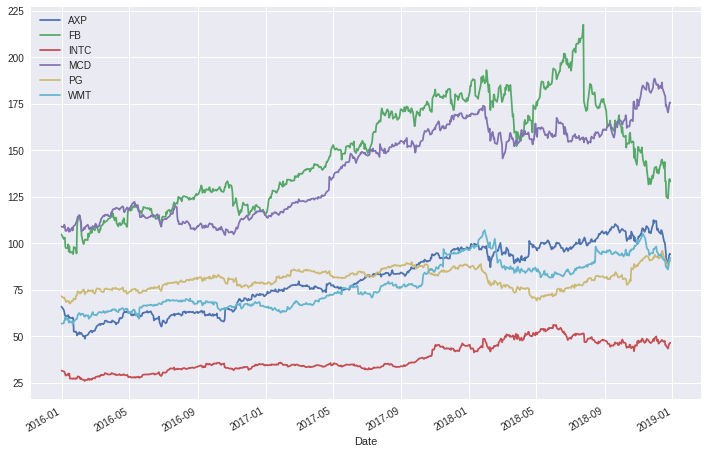

In [ ]:
## Your answer:





## Resample stocks to monthly frequency (last trading price of each month) (5%)

[Hint] Utilize **.resample** and save resampled Dataframe
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html


In [ ]:
## Your answer:




,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-29,50.922123,112.209999,28.307537,114.170799,74.142738,61.404896
2016-02-29,52.901901,106.919998,27.240244,108.911270,72.872086,61.386375
2016-03-31,58.441471,114.099998,29.781067,116.801506,74.705444,63.844990
2016-04-29,62.578789,117.580002,27.875446,117.554268,73.313026,62.334877


## Calculate monthly returns, save the result, and drop Nan values (5%)

[Hint] Utilize .pct_change()
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html


In [ ]:
## Your answer:




,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01-29,-0.227403,0.072138,-0.099564,0.047740,0.037677,0.082545
2016-02-29,0.038879,-0.047144,-0.037703,-0.046067,-0.017138,-0.000302
2016-03-31,0.104714,0.067153,0.093275,0.072446,0.025159,0.040051
2016-04-29,0.070794,0.030500,-0.063988,0.006445,-0.018639,-0.023653
2016-05-31,0.005044,0.010461,0.052274,-0.035022,0.011483,0.066221
2016-06-30,-0.071383,-0.038128,0.038303,-0.006845,0.044793,0.031647
2016-07-29,0.060895,0.084529,0.062805,-0.022353,0.018781,-0.000685
2016-08-31,0.017375,0.017589,0.037351,-0.009274,0.020096,-0.014265
2016-09-30,-0.023483,0.017047,0.051825,-0.002594,0.027947,0.009518


## Calculate mean and standard deviation of monthly returns (5%)

In [ ]:
## Your answer:




,mean,std
AXP,0.012162,0.065456
FB,0.008656,0.063183
INTC,0.012559,0.058963
MCD,0.014179,0.041817
PG,0.007358,0.039945
WMT,0.014997,0.054054


# Q4 (20%)

In [139]:
## Don't edit this block
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv("cars.csv")

## Create the following plot (4%)
[Note] You can use different color palette and size, but you should use the right X and Y axis.

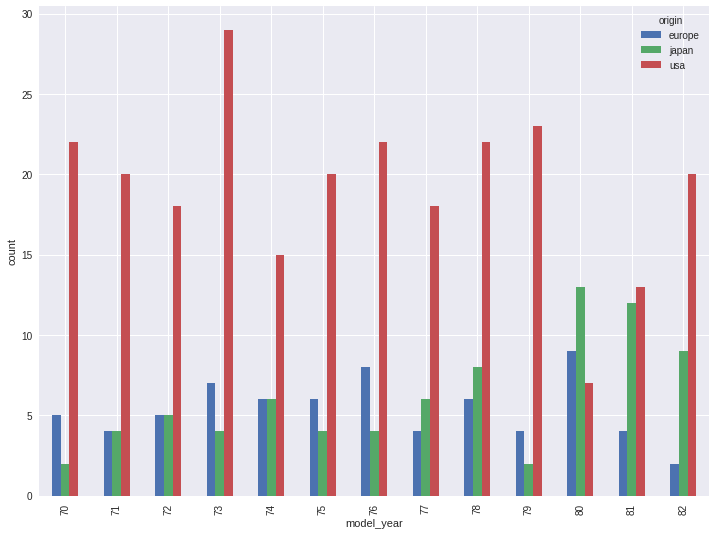

In [140]:
## Your answer:

cars_gb = cars.groupby(['model_year', 'origin']).size().unstack(level=1)

cars_gb.plot(kind = 'bar', figsize = (12, 9), ylabel = 'count')

## Create the following plot (4%)

[Note] You can use different color palette and size, but you should use the right X and Y axis.

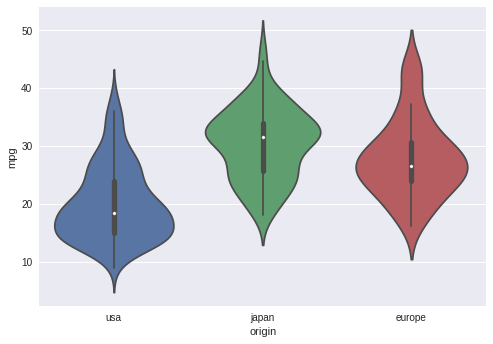

In [141]:
## Your answer:


sns.violinplot(x ="origin", y ="mpg", data = cars)

## Create the following plot (4%)

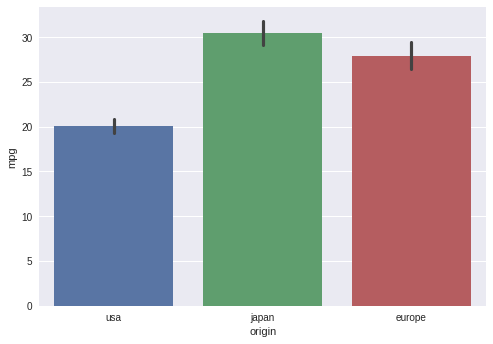

In [142]:
## Your answer:

sns.barplot(x ='origin',y ='mpg', data = cars) 


## **Add** a new column "gpm" with fuel efficiency in gallons per 100 miles unit and **Drop** the original mpg column (4%)

In [143]:
## Your answer:

cars ['gpm'] = round(100/ (cars['mpg']), 2)
cars = cars.drop(columns = "mpg")
cars.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,5.56
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.67
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,5.56
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.25
4,8,302.0,140.0,3449,10.5,70,usa,ford torino,5.88


## Create the following plot (4%)

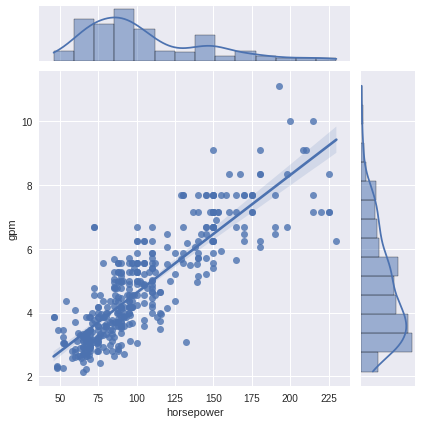

In [145]:
## Your answer:

sns.jointplot(data = cars, x = "horsepower", y="gpm", kind="reg")

# Q5 (20%)

## Connect MySQL with Python




In [ ]:
## Don't edit this block

!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.4 MB 83.7 MB/s 


In [ ]:
## Don't edit this block

import mysql.connector
from mysql.connector import Error
import pandas as pd

## Create your free online MySQL database: https://www.freemysqlhosting.net/ (5%)

1. Create a free account
2. Create a database
3. Create a table in the database (Column indexes: Name, Email (primary key), Birthday, Comments)

In [ ]:
### This function is to connect your code with MySQL database
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection


### This function is to execute SQL queries
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")




## Fill in your account and database information to connect with it
## Your answer:
host_name = "......"
user_name = "....."
your_password = "......."
connection = create_db_connection(.......)



MySQL Database connection successful


## Insert two rows (5%)

[Note] Assign EMAIL as a primary key

In [ ]:
## Your answer:


Error: '1062 (23000): Duplicate entry 'ejli.uiuc@gmail.com' for key 'PRIMARY''


## Creare a SQL function to read yor SQL database (5%)
[Hint] Please refer to the "execute_query(connection, query)"
https://dev.mysql.com/doc/connector-python/en/connector-python-api-mysqlcursor.html

In [ ]:
## Your answer:
def read_query(connection, query):
  ......

## Read all rows in your table (5%)

In [ ]:
## Your answer:




('James', 'ejli.uiuc@gmail.com', None, '12345')
('James', 'ejli.uiuc@gmailcom', None, '12345')
('James', 'ejliuiucgmailcom', None, '12345')
